In [1]:
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import optimize

np.random.seed(123)

alpha, sigma =1, 1
beta = [1, 7]

size = 100

X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv im

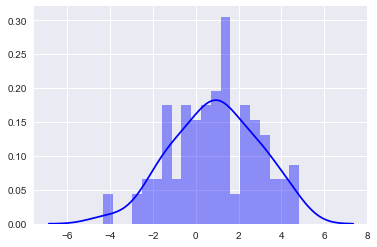

In [2]:
sns.set(style='darkgrid')
sns.despine(left=True)
sns.distplot(Y, kde=True, color='b', bins=20)
#plt.tight_layout()

Text(0.5,0,'X2')

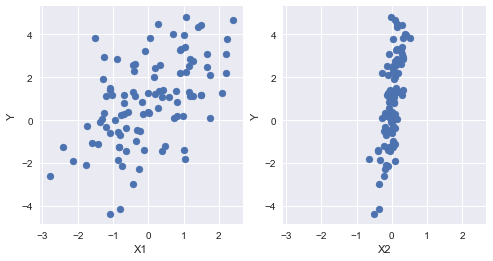

In [3]:
fig, axes = plt.subplots(1,2, figsize=(8,4), sharex=True)
axes[0].scatter(X1, Y)
axes[0].set_ylabel('Y');axes[0].set_xlabel('X1')
axes[1].scatter(X2, Y)
axes[1].set_ylabel('Y');axes[1].set_xlabel('X2')

In [4]:
basic_model = pm.Model()

with basic_model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)
    
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [5]:
map_estimate = pm.find_MAP(model=basic_model, fmin=optimize.fmin_powell)
map_estimate

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:92: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -149.21:   4%|▉                     | 210/5000 [00:00<00:17, 275.37it/s]

Optimization terminated successfully.
         Current function value: 149.202914
         Iterations: 5
         Function evaluations: 218


logp = -149.21:   4%|▉                     | 218/5000 [00:00<00:17, 271.48it/s]


{'alpha': array(0.90853125),
 'beta': array([0.95070503, 7.1112437 ]),
 'sigma': array(0.96578039),
 'sigma_log__': array(-0.03481881)}

In [6]:
with basic_model:
    start = pm.find_MAP(fmin=optimize.fmin_powell)
    step = pm.Slice()
    
    trace = pm.sample(500, step=step, start=start)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:92: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -149.21:   4%|▉                     | 210/5000 [00:00<00:16, 290.48it/s]

Optimization terminated successfully.
         Current function value: 149.202914
         Iterations: 5
         Function evaluations: 218


logp = -149.21:   4%|▉                     | 218/5000 [00:00<00:16, 285.71it/s]
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [sigma_log__]
>Slice: [beta]
>Slice: [alpha]


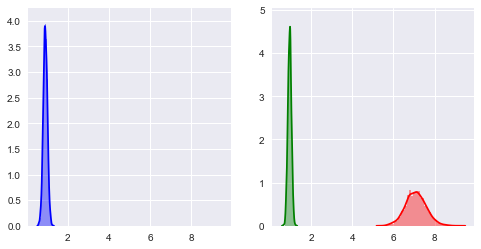

In [7]:
fig, axes = plt.subplots(1,2, figsize=(8,4), sharex=True)
sns.distplot(trace['alpha'], kde=True, color='b', ax=axes[0])
sns.distplot(trace['beta'][:,0], kde=True, color='g', ax=axes[1])
sns.distplot(trace['beta'][:,1], kde=True, color='r', ax=axes[1])

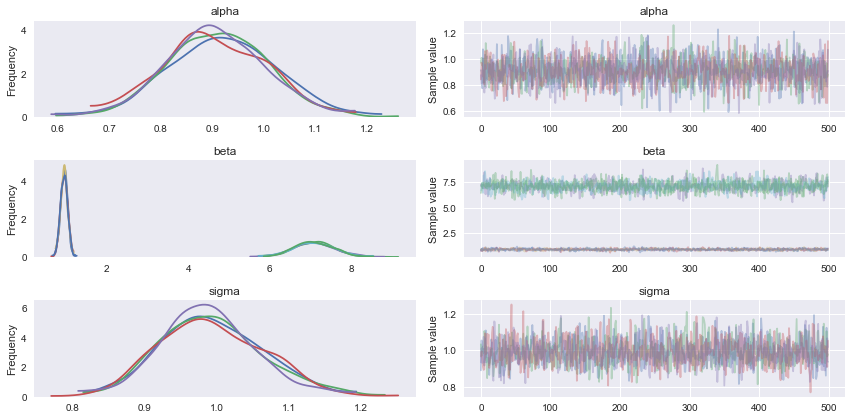

In [10]:
_ = pm.traceplot(trace)

In [11]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.909298,0.100699,0.002135,0.718118,1.115656,2000.0,1.001492
beta__0,0.949443,0.085879,0.001932,0.772578,1.107057,1774.0,0.999563
beta__1,7.084540,0.503312,0.009929,6.047793,8.054758,1931.0,0.999036
sigma,0.991847,0.070076,0.001529,0.859855,1.134393,1881.0,0.999773
